## Model Training

# 1.1 Importing data and required packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor    
import warnings
 

# Importing data using pandas

In [5]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Use Math score as a dependent feature

In [7]:
X = df.drop(columns=['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

# Now lets transform the categorical features

In [9]:
# Create Column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude = "object").columns  # numerical features
cat_features = X.select_dtypes(include = "object").columns  # categorical features

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
]

)

In [10]:
X  = preprocessor.fit_transform(X)

# Now Split data for training and testing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

# Create an evaluation fucntion

In [12]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mse, rmse, mae, r2

# Develop models

In [13]:
models = {
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "SVM": SVR(),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "CatBoost": CatBoostRegressor(),
    "XGBoost": XGBRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)    # Train the model

    #Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test) 

    #Model evaluations of training and testing data
    model_train_mae, model_train_rmse, model_train_mae, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_mae, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training Set')
    print('MAE is {}'.format(model_train_mae))  
    print('RMSE is {}'.format(model_train_rmse))
    print('R2 score is {}'.format(model_train_r2))

    print('--------------------------------')


    print('Model Performance for Testing Set')
    print('MAE is {}'.format(model_test_mae))
    print('RMSE is {}'.format(model_test_rmse))
    print('R2 score is {}'.format(model_test_r2))
    r2_list.append(model_test_r2)
    print('--------------------------------')

    print('='*35)
    print('\n')

KNN
Model Performance for Training Set
MAE is 4.516749999999999
RMSE is 5.707683417990174
R2 score is 0.8554978341651085
--------------------------------
Model Performance for Testing Set
MAE is 5.621
RMSE is 7.253040741647602
R2 score is 0.7838129945787431
--------------------------------


Decision Tree
Model Performance for Training Set
MAE is 0.01875
RMSE is 0.2795084971874737
R2 score is 0.9996534669718089
--------------------------------
Model Performance for Testing Set
MAE is 6.13
RMSE is 7.937253933193772
R2 score is 0.7411012811788029
--------------------------------


Random Forest
Model Performance for Training Set
MAE is 1.83994375
RMSE is 2.3336427862551505
R2 score is 0.9758440923339884
--------------------------------
Model Performance for Testing Set
MAE is 4.587641666666666
RMSE is 5.960849551448183
R2 score is 0.8539822429382292
--------------------------------


AdaBoost
Model Performance for Training Set
MAE is 4.698562461193883
RMSE is 5.736105663836037
R2 score i

# Results

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model Name', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model Name,R2 Score
6,Ridge,0.880593
5,Linear Regression,0.880433
2,Random Forest,0.853982
8,CatBoost,0.851632
3,AdaBoost,0.849263
9,XGBoost,0.827797
7,Lasso,0.825320
0,KNN,0.783813
1,Decision Tree,0.741101
4,SVM,0.728600


# Ridge and Linear regression have arguably the same R2 scores, so for simplicity, i will choose LR

In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"R2 Score: {score:.2f}%")

R2 Score: 88.04%


Text(0.5, 1.0, 'Actual Math Score vs Predicted Math Score')

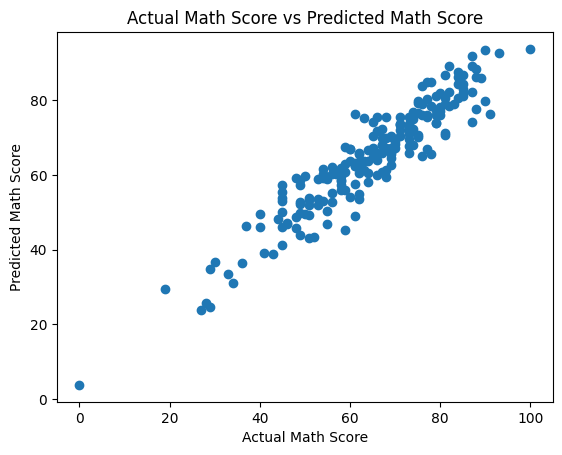

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual Math Score vs Predicted Math Score')

<Axes: xlabel='math_score'>

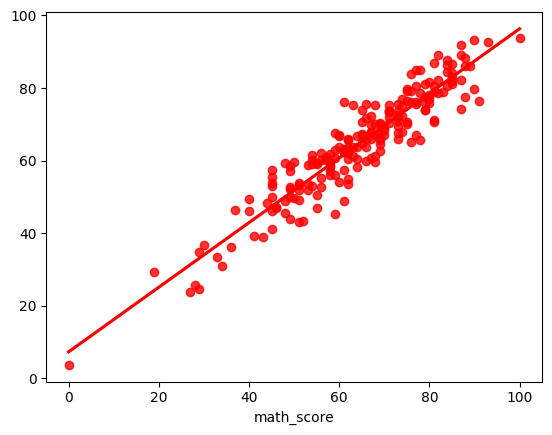

In [17]:
sns.regplot(x=y_test, y=y_pred,ci=None, color='red')

In [18]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
